In [2]:
import datetime


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [2]:
df_ooi = pd.read_csv("data/ooi-gi01sumo-sbd12-02-flortd000_655e_fffa_3b24.csv", skiprows=1, parse_dates=["UTC"])
df_ooi = df_ooi.rename(columns = {"UTC": "time", "m": "z", "microg.L-1": "mass_concentration_of_chlorophyll_a_in_sea_water", "m-1": "flubsct", })
del df_ooi["z"]
df_ooi = df_ooi.set_index("time")

In [3]:
df_ooi.head()

,mass_concentration_of_chlorophyll_a_in_sea_water,flubsct
time,,
2014-09-10 19:00:00+00:00,1.366800,0.003883
2014-09-10 19:01:00+00:00,1.430513,0.003996
2014-09-10 19:02:00+00:00,1.300551,0.003962
2014-09-10 19:03:00+00:00,1.715850,0.004220
2014-09-10 19:15:00+00:00,1.144603,0.004007


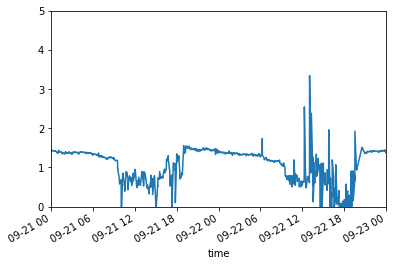

In [4]:
df_ooi["mass_concentration_of_chlorophyll_a_in_sea_water"].plot()
plt.ylim((0, 5))
plt.xlim((datetime.date(2014, 9, 21), datetime.date(2014, 9, 23)))
plt.show()

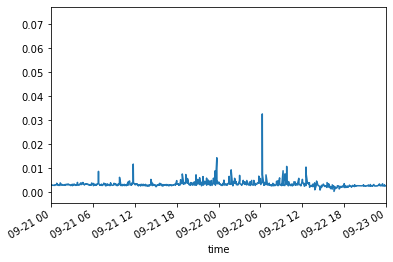

In [5]:
df_ooi["flubsct"].plot()
#plt.ylim((0, 5))
plt.xlim((datetime.date(2014, 9, 21), datetime.date(2014, 9, 23)))
plt.show()

<AxesSubplot:xlabel='time'>

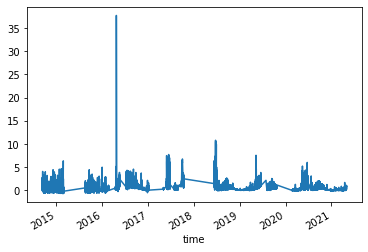

In [6]:
df_ooi["mass_concentration_of_chlorophyll_a_in_sea_water"].plot()

<AxesSubplot:xlabel='time'>

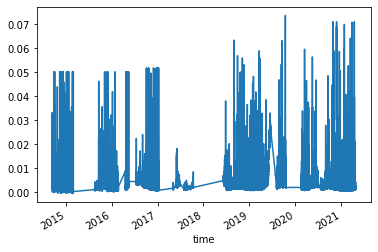

In [7]:
df_ooi["flubsct"].plot()

In [3]:
df_ooi = pd.read_csv("data/ooi-gi01sumo-sbd12-02-flortd000_655e_fffa_3b24.csv", skiprows=1, parse_dates=["UTC"])
df_ooi = df_ooi.rename(columns = {"UTC": "time", "m": "z", "microg.L-1": "mass_concentration_of_chlorophyll_a_in_sea_water", "m-1": "flubsct", })
del df_ooi["z"]
df_ooi = df_ooi.set_index("time")

array_obs = df_ooi["mass_concentration_of_chlorophyll_a_in_sea_water"].resample("1D").max().to_numpy()
array_datetime = df_ooi["mass_concentration_of_chlorophyll_a_in_sea_water"].resample("1D").max().index.to_numpy()
array_cross = df_ooi["flubsct"].resample("1D").max().to_numpy()

list_split_index = list(np.where(np.isnan(array_obs))[0])
list_split_index.append(len(array_obs))
list_split_index.insert(0, 0)
list_subseq = []
list_subseq_cross = []
list_subseq_datetime = []
for tmp_index in range(len(list_split_index) - 1):
    tmp_index_left = list_split_index[tmp_index] + 1
    tmp_index_right = list_split_index[tmp_index + 1]
    if tmp_index_right - tmp_index_left < 20:
        continue
    list_subseq.append(array_obs[tmp_index_left:tmp_index_right])
    list_subseq_datetime.append(array_datetime[tmp_index_left:tmp_index_right])
    list_subseq_cross.append(array_cross[tmp_index_left:tmp_index_right])
    

In [5]:
import matplotlib.dates as mdates

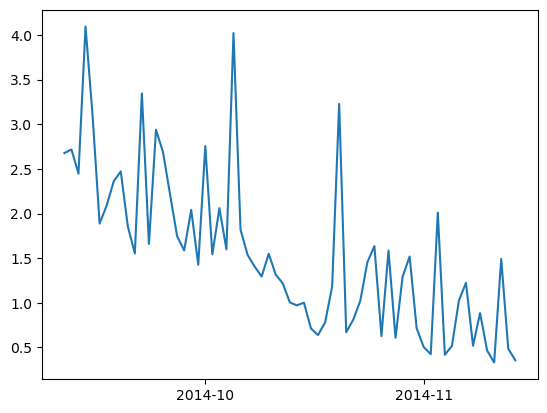

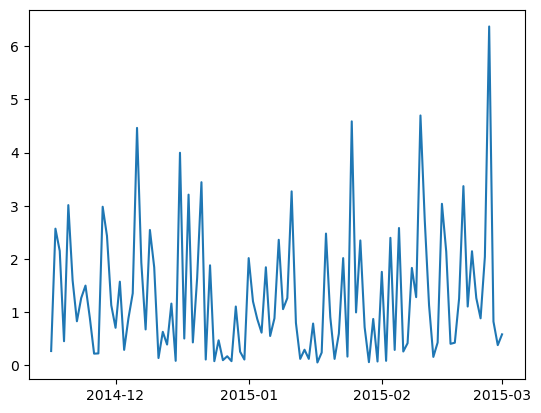

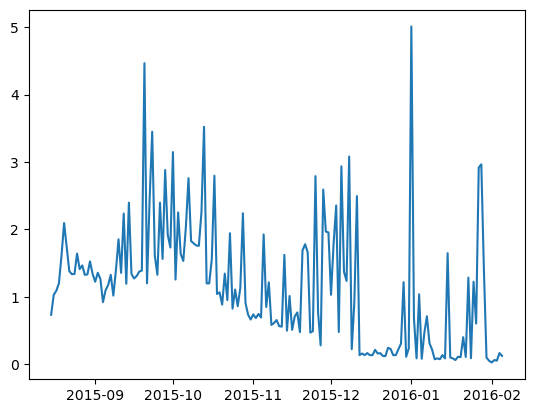

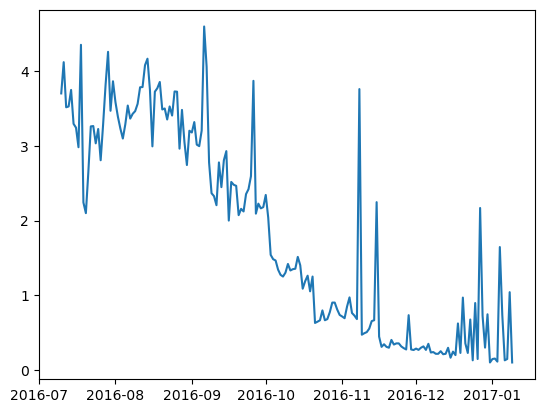

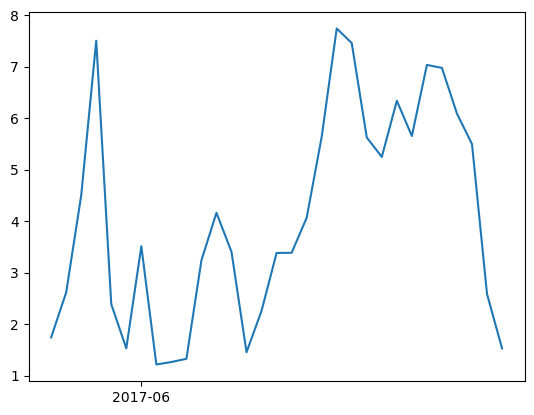

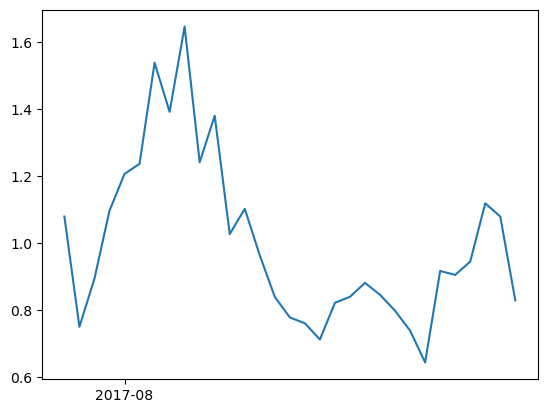

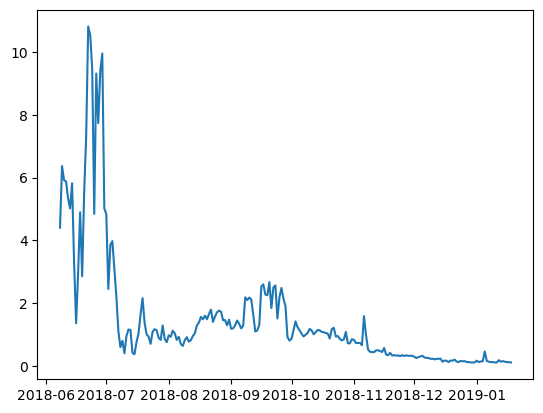

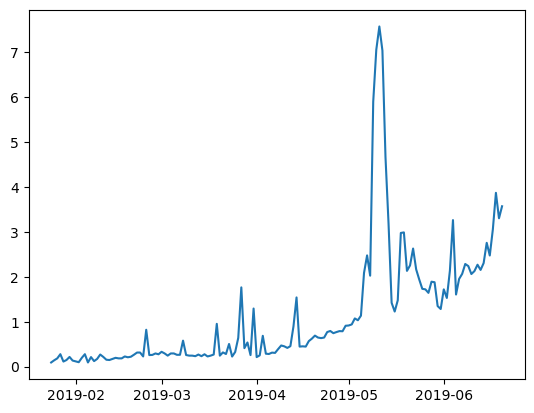

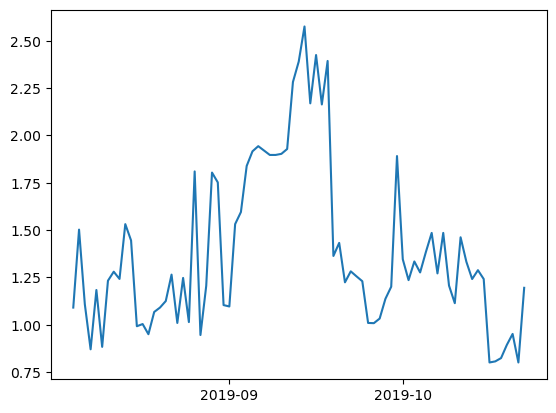

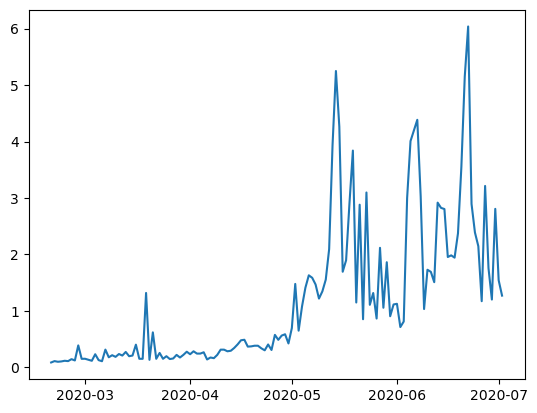

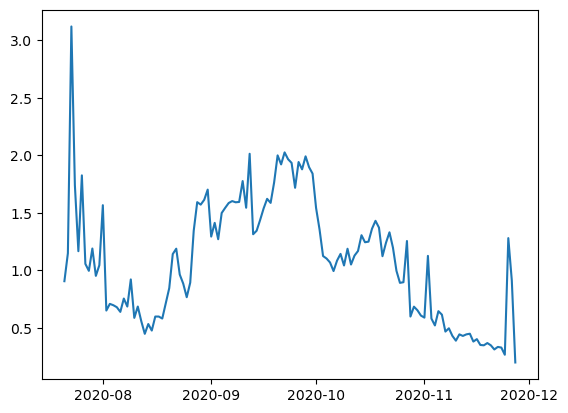

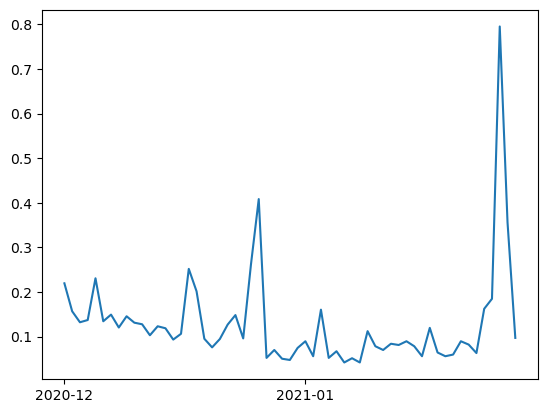

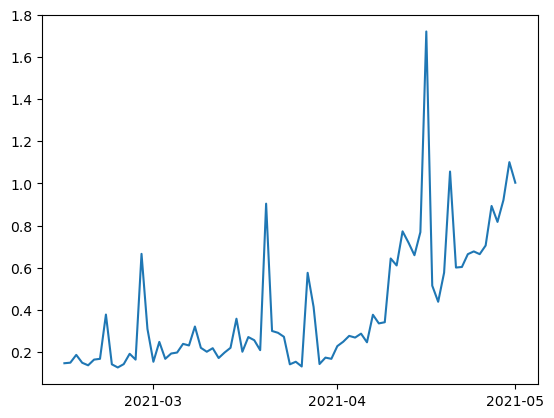

In [6]:
for cc, (tmp_subseq, tmp_subseq_cross, tmp_subseq_datetime) in enumerate(zip(list_subseq, list_subseq_cross, list_subseq_datetime)):
    
    plt.plot(tmp_subseq_datetime, tmp_subseq)
    
    locator = mdates.MonthLocator() 
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    
    plt.show()
    